# GMSC Analysis

The main objective is to explore GMSC data (100AA smORFs) by generating rarefaction curves, which is a measure of biodiversity, helping to understand the richness for each habitat.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import altair as alt

## Altair

In [2]:
alt.data_transformers.disable_max_rows()

n_perms = 24

results_dir = 'rarefaction_results/high/'

high_envs = os.listdir(results_dir)

envs_df = pd.DataFrame()

for env in high_envs:
    df = pd.concat([pd.read_csv(results_dir + env + '/perm_' + str(i) + '.tsv', sep = '\t') for i in range(n_perms)]).groupby(level=0).mean()
    df['smorfs'] = df['smorfs']/1e6
    df['env'] = env.replace('_', ' ').replace('-', '/')

    envs_df = envs_df.append(df)

alt.Chart(envs_df).mark_line().encode(
    x = alt.X('k', title = 'Number of Samples'),
    y = alt.Y('smorfs', title = 'Number of smORFs (millions)'),
    color = alt.Color('env', title = 'Environment')
).properties(
    width=700,
    height=400
).configure_axis(grid=False)

alt.Chart(...)

## Seaborn

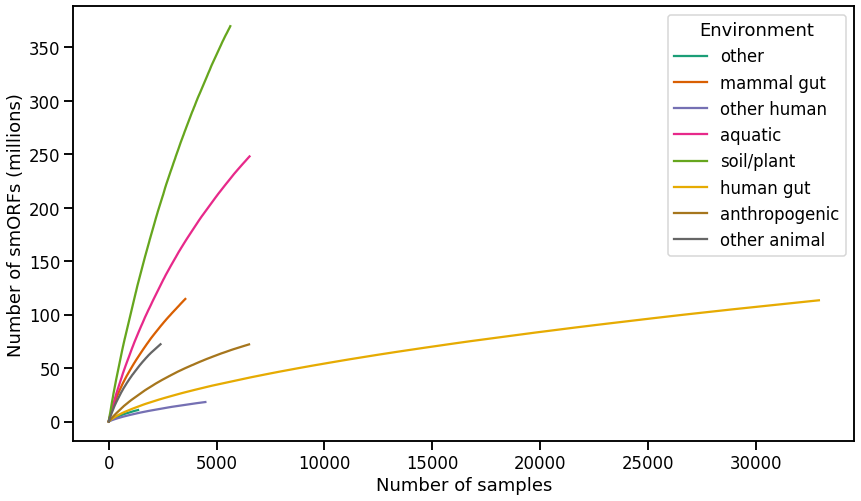

In [3]:
sns.set_context("talk")

n_perms = 24

results_dir = 'rarefaction_results/high/'

high_envs = os.listdir(results_dir)

envs_df = pd.DataFrame()

for env in high_envs:
    df = pd.concat([pd.read_csv(results_dir + env + '/perm_' + str(i) + '.tsv', sep = '\t') for i in range(n_perms)]).groupby(level=0).mean()
    df['smorfs'] = df['smorfs']/1e6
    df['env'] = env.replace('_', ' ').replace('-', '/')

    envs_df = envs_df.append(df)

envs_df = envs_df.reset_index(drop=True)

ax = sns.lineplot(data = envs_df, x = 'k', y = 'smorfs', hue = 'env', palette='Dark2')

ax.set_xlabel('Number of samples')
ax.set_ylabel('Number of smORFs (millions)')
ax.get_legend().set_title('Environment')

plt.gcf().set_size_inches(14, 8)